In [1]:
from datasets import load_dataset
import pandas as pd
from fastai.tabular.all import *
from fastai.metrics import F1Score, CohenKappa
from sklearn.metrics import accuracy_score, confusion_matrix

dt = load_dataset("./Diffusion-all_knots")

In [2]:
df = dt['train'].to_pandas()
df.Tool.unique()

array(['Evodiff', 'RFdiffusion', 'Real'], dtype=object)

In [4]:
RFdiffusion = df[df.Tool == 'RFdiffusion'].drop(columns=["Sequence", "Tool", "ID"]).copy()
Evodiff = df[df.Tool == 'Evodiff'].drop(columns=["Sequence", "Tool", "ID"]).copy()
Real = df[df.Tool == 'Real'].drop(columns=["Sequence", "Tool", "ID"]).copy()

training_df = RFdiffusion

In [6]:
# Preparing data loader and defining the model

splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(dff))
procs = [Normalize]
cont, cat = cont_cat_split(dff, max_card=9000, dep_var='Label')
to = TabularPandas(df, procs=procs, cat_names=cat, cont_names=cont, 
                   y_names='Label', splits=splits, y_block=CategoryBlock)

dls = to.dataloaders(bs=64)

learn = tabular_learner(dls, layers=[500,200], metrics=[accuracy, F1Score(), CohenKappa()])


In [12]:
# Training the model

learn.fit_one_cycle(3, lr_max=0.0005)

epoch,train_loss,valid_loss,accuracy,f1_score,cohen_kappa_score,time
0,0.631369,0.572039,0.776000,0.508772,0.366129,00:00
1,0.532721,0.519826,0.796000,0.514286,0.385409,00:00
2,0.449569,0.510141,0.809000,0.521303,0.402026,00:00


In [7]:
# test data
test_dl = learn.dls.test_dl(Real)
learn.get_preds(dl = test_dl)

(tensor([[0.4329, 0.5671],
         [0.5434, 0.4566],
         [0.4983, 0.5017],
         ...,
         [0.5364, 0.4636],
         [0.4775, 0.5225],
         [0.4827, 0.5173]]),
 tensor([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [1]], dtype=torch.int8))

In [15]:
# metrics on test data (real proteins)

preds, targets = learn.get_preds(dl=test_dl)

class_preds = preds.argmax(dim=1)
accuracy = accuracy_score(targets, class_preds)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(targets, class_preds)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7668
Confusion Matrix:
[[3732  268]
 [ 898  102]]


In [16]:
3732 * 102 / 264 / 898

1.6056894108119053

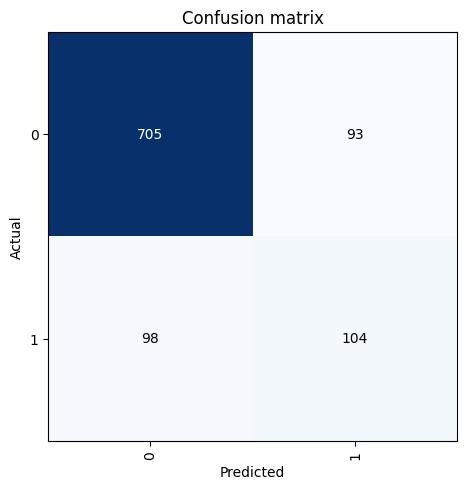

In [13]:
# metrics on validation dataset

interp = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix
interp.plot_confusion_matrix()

In [14]:
705 * 104 / 93 /98

8.04476629361422